# Question 1: What is each states’ instructional spend (y) from 2009-2016 (x)?
### Line graph of regional (S, MW, NE, W) spend for 50 states & DC 
o   Phase 1: Normalize as a ratio starting from the first year (2009)  
o   Phase 2: Nominal or actual spend dollars – does it account for inflation?

**Goal:** a) Figure out states that are outliers in terms of funding over the years b) Figure out which states improved in funding over the years

In [1]:
'''
Load the finance data and import all necessary libraries  
'''
import random
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from functools import reduce

valid_regions = ["Northeast", "South", "West", "Midwest"]
valid_years = ["2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016"]
valid_cols = ["rev_total", "state_name", "region","year", 'exp_current_instruction_total']

finance_df = pd.read_csv('finance_data/districts_ccd_finance.csv.zip', low_memory=False)
finance_df.head()

,year,leaid,fips,censusid,rev_total,rev_fed_total,rev_fed_child_nutrition_act,rev_fed_state_title_i,rev_fed_state_idea,rev_fed_state_math_sci_teach,...,debt_longterm_issued_FY,debt_longterm_retired_FY,debt_longterm_outstand_end_FY,debt_shortterm_outstand_beg_FY,debt_shortterm_outstand_end_FY,assets_sinking_fund,assets_bond_fund,assets_other,enrollment_fall_responsible,enrollment_fall_school
0,1991,0100005,1.0,15048401.0,11265000.0,1012000.0,285000,413000,140000,10000,...,0.0,0,0.0,0,0.0,0,0.0,732000.0,3084.0,NaN
1,1991,0100006,1.0,15048001.0,22855000.0,2009000.0,854000,671000,249000,18000,...,0.0,2000,12385000.0,0,0.0,370000,1679000.0,511000.0,6139.0,NaN
2,1991,0100007,1.0,15037401.0,36812000.0,651000.0,179000,99000,286000,6000,...,44159000.0,260000,53960000.0,0,0.0,0,30420000.0,3816000.0,6328.0,NaN
3,1991,0100030,1.0,15062002.0,14397000.0,1014000.0,279000,447000,136000,12000,...,5353000.0,192000,6449000.0,0,0.0,0,2005000.0,2619000.0,3783.0,NaN
4,1991,0100060,1.0,15020001.0,7768000.0,948000.0,247000,295000,295000,8000,...,0.0,0,0.0,0,0.0,0,0.0,144000.0,2154.0,NaN


In [2]:
'''
Map geographic data (region, state) to finance data &  drop NaN rows. 
'''

value_mappings = pd.read_excel(open('finance_data/codebook_districts_ccd_finance.xls', 'rb'), sheet_name='values')

fips_states = value_mappings[value_mappings["format"] == "fips"].set_index('code').code_label.to_dict()
finance_df["state_name"] = finance_df["fips"].map(fips_states)

fips_regions = value_mappings[value_mappings["format"] == "fips"].set_index('code').region.to_dict()
finance_df["region"] = finance_df["fips"].map(fips_regions)

finance_df = finance_df[finance_df.year >= 2009 ]
#TODO: drop all NaN or just those whose regions are NaN?
finance_df.dropna(subset=valid_cols, inplace=True)

finance_df.head()

,year,leaid,fips,censusid,rev_total,rev_fed_total,rev_fed_child_nutrition_act,rev_fed_state_title_i,rev_fed_state_idea,rev_fed_state_math_sci_teach,...,debt_longterm_outstand_end_FY,debt_shortterm_outstand_beg_FY,debt_shortterm_outstand_end_FY,assets_sinking_fund,assets_bond_fund,assets_other,enrollment_fall_responsible,enrollment_fall_school,state_name,region
258542,2009,0100002,1.0,-2.000000e+00,-2.0,-2.0,-2,-2,-2,-2,...,-2.0,-2,-2.0,-2,-2.0,-2.0,0.0,0.0,Alabama,South
258543,2009,0100005,1.0,1.504840e+12,38927000.0,6477000.0,1371000,2060000,1282000,184000,...,31401000.0,0,0.0,0,7237000.0,3052000.0,4104.0,4104.0,Alabama,South
258544,2009,0100006,1.0,1.504800e+12,57766000.0,11705000.0,2389000,4483000,1926000,466000,...,20448000.0,0,0.0,825000,934000.0,3098000.0,5777.0,5777.0,Alabama,South
258545,2009,0100007,1.0,1.503740e+12,149924000.0,9191000.0,1557000,863000,3055000,203000,...,297009000.0,0,0.0,60091000,1713000.0,67018000.0,12889.0,12889.0,Alabama,South
258546,2009,0100008,1.0,1.504530e+12,85030000.0,6893000.0,949000,698000,2420000,142000,...,68608000.0,0,0.0,0,29298000.0,12231000.0,8654.0,8654.0,Alabama,South


In [3]:
'''
Clean Up Unused Cols and group by state_name, year and total revenue  
'''

print(finance_df.columns)

revenue_df = finance_df.filter(valid_cols, axis=1).groupby(['state_name', "year", "region"])["rev_total"].sum().reset_index(name="total")
revenue_df.head()

Index(['year', 'leaid', 'fips', 'censusid', 'rev_total', 'rev_fed_total',
       'rev_fed_child_nutrition_act', 'rev_fed_state_title_i',
       'rev_fed_state_idea', 'rev_fed_state_math_sci_teach',
       ...
       'debt_longterm_outstand_end_FY', 'debt_shortterm_outstand_beg_FY',
       'debt_shortterm_outstand_end_FY', 'assets_sinking_fund',
       'assets_bond_fund', 'assets_other', 'enrollment_fall_responsible',
       'enrollment_fall_school', 'state_name', 'region'],
      dtype='object', length=135)


,state_name,year,region,total
0,Alabama,2009,South,7.281058e+09
1,Alabama,2010,South,7.376725e+09
2,Alabama,2011,South,7.136949e+09
3,Alabama,2012,South,7.207923e+09
4,Alabama,2013,South,7.421357e+09


In [4]:
'''
Clean Up Unused Cols and group by state_name, year and total expidenture 
'''
expidenture_df = finance_df.filter(valid_cols, axis=1).groupby(['state_name', "year", "region"])["exp_current_instruction_total"].sum().reset_index(name="total")
#.reset_index("total_spend")
expidenture_df.head()

,state_name,year,region,total
0,Alabama,2009,South,3.898087e+09
1,Alabama,2010,South,3.841672e+09
2,Alabama,2011,South,3.692847e+09
3,Alabama,2012,South,3.749129e+09
4,Alabama,2013,South,3.853778e+09


# Method to Plot Financial Data for Given States (plt)

In [92]:
'''Create Method to plot finances for a group of given states over given year for states '''
#TODO: pass name of column that has the values to sum, pass transformation_lambda 

def plot_finances_as_ratio_of_year_one_plt(df, states, years, title="", region=""): 
    
    data = df[df.state_name.isin(states)]
    
    colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(len(states))]
    fig, ax = plt.subplots()
    
    for i in range(len(states)):
        curr_state = states[i]
        curr_totals = data.loc[data['state_name']== curr_state ]['total']
        starting_total =  curr_totals.iloc[0]

        normalized_totals = np.array([x/starting_total for x in curr_totals])

        if(len(curr_totals) != len(years)):
            print("Missing some data for state: ", curr_state, " . Skipping...")
        else:
            x , y =  years, normalized_totals
            plt.scatter(x, y, c=colors[i], label=curr_state, alpha=1, edgecolors='none')
            plt.plot(x, y)

    ax.legend(title='States', bbox_to_anchor=(1, 1), fancybox=True, framealpha=1, shadow=True, borderpad=1)
    ax.grid(True)
    
    plt.title('{} By State Over Time As Ratio of Year 1 for the {}'.format(title, region))
    plt.xlabel('Years', fontsize=12)
    plt.ylabel('Normalized Total Expidenture', fontsize=12)
    plt.xticks(np.arange(np.min(years), np.max(years)+1, 1))

    plt.show()

# Method to Plot Financial Data for Given States (sns)

In [93]:
'''Define method for seaborn'''
#TODO: pass name of column that has the values to sum, pass transformation_lambda 


def plot_finances_as_ratio_of_year_one_sns(df, states, years, title_name, region=None): 
    
    data = df[df.state_name.isin(states)]
    
    fig, ax = plt.subplots()

    for state in states:
                
        curr_total_expidentures = data.loc[data['state_name'] == state]['total']
        starting_expidenture =  curr_total_expidentures.iloc[0]
    
        data['total'].loc[data['state_name'] == state] = curr_total_expidentures.apply(lambda x: x/starting_expidenture)

    sns.lineplot(data=data, x='year', y='total', hue='state_name',  size=4, legend='brief')
    ax.legend(bbox_to_anchor=(1,1), fancybox=True, framealpha=1, shadow=True, borderpad=1)

    title = '{} By State Over Time As Ratio of Year 1 for the {}'.format(title_name, region) if region else '{} By State Over Time As Ratio of Year 1'.format(title)
    fig.suptitle('{} By State Over Time As Ratio of Year 1 for the {}'.format(title_name, region), fontsize=16)
    plt.show()
    

# Expidenture Data (State by State - plt)

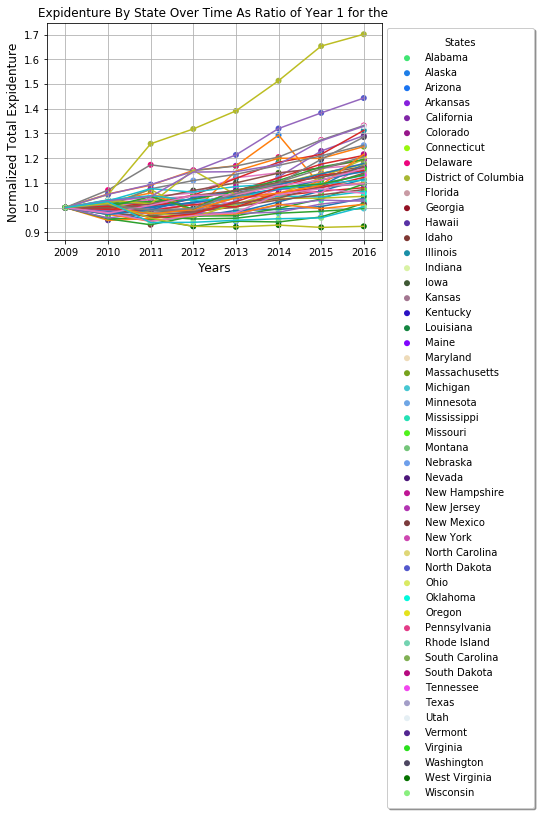

In [94]:
'''
Plot the total expidenture (fed, state, local) for all states by year starting at 1.0 for Year 1 (2019)
'''
states = expidenture_df['state_name'].unique()
years = expidenture_df['year'].unique()

plot_finances_as_ratio_of_year_one_plt(expidenture_df, states, years, "Expidenture")

# Expidenture Data (Region By Region - plt)

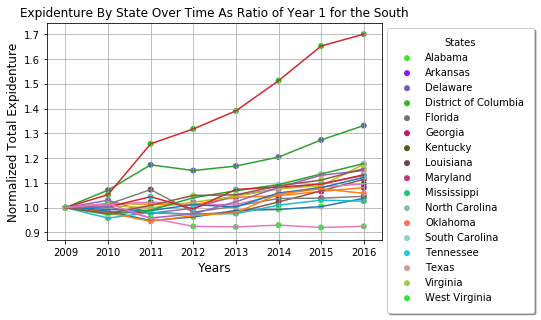

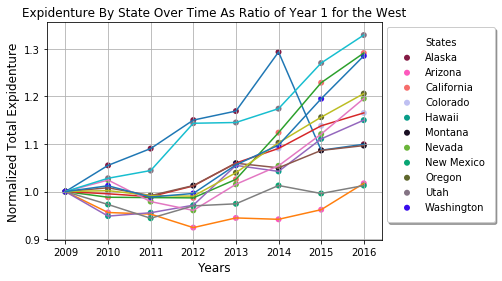

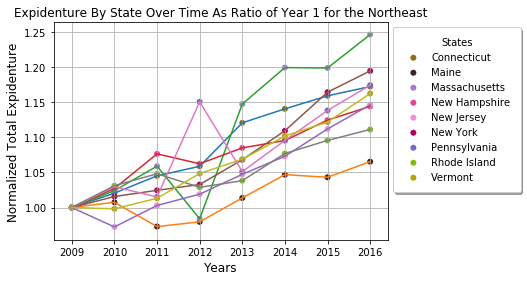

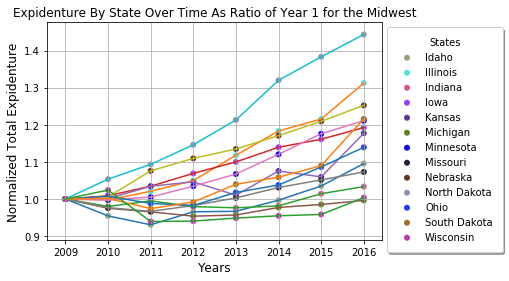

In [95]:
'''
Plot the total expidenture (fed, state, local) for all states by year starting at 1.0 for Year 1 (2019)
'''

for region in expidenture_df['region'].unique(): 
    
    states = expidenture_df.loc[expidenture_df['region'] == region]['state_name'].unique()
    years = expidenture_df['year'].unique()
    plot_finances_as_ratio_of_year_one_plt(expidenture_df, states, years, "Expidenture", region)

# Expidenture Data (Region By Region - sns)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


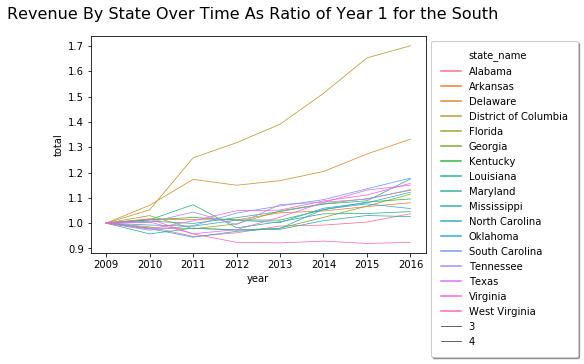

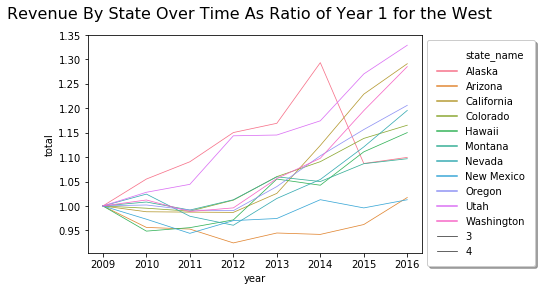

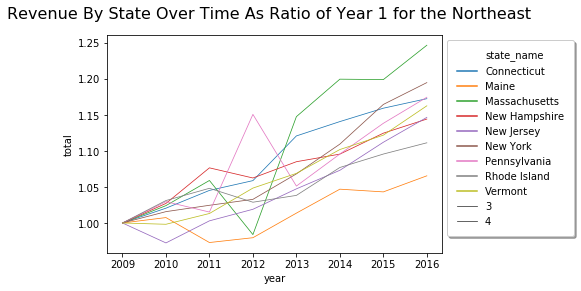

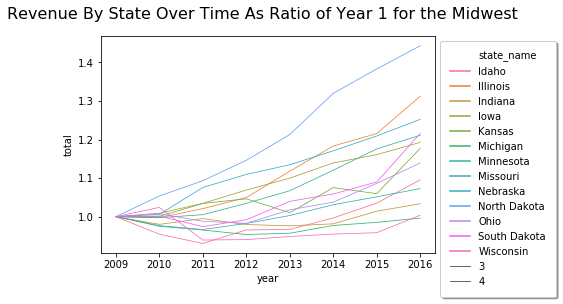

In [88]:
'''
Plot the total expidenture(fed, state, local) for all states by year starting at 1.0 for Year 1 (2019)
'''

for region in expidenture_df['region'].unique(): 

    states = expidenture_df.loc[expidenture_df['region'] == region]['state_name'].unique()
    years = expidenture_df['year'].unique()   
    title_name= 'Revenue'   
    
    plot_finances_as_ratio_of_year_one_sns(expidenture_df, states, years, title_name, region)

# Revenue Data (State by State - plt)

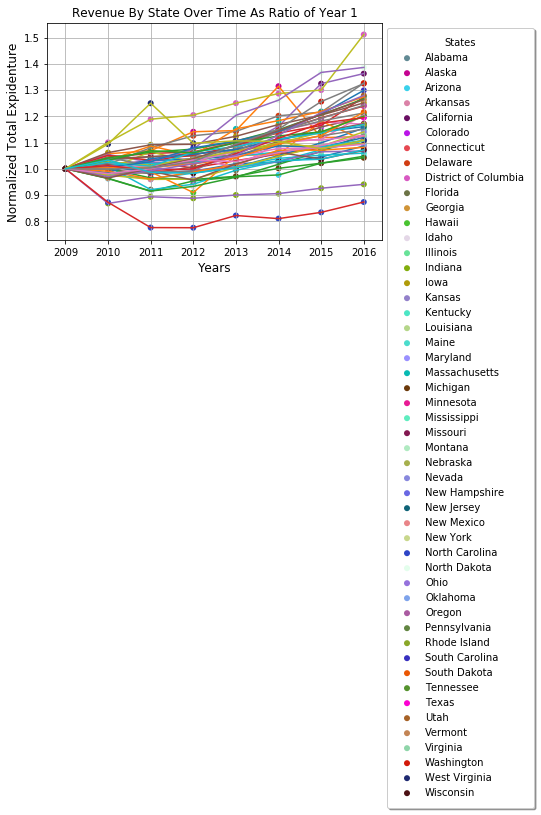

In [9]:
'''
Plot the total revenue (fed, state, local) for all states by year starting at 1.0 for Year 1 (2019)
'''
states = revenue_df['state_name'].unique()
years = revenue_df['year'].unique()

plot_finances_as_ratio_of_year_one_plt(revenue_df, states, years, "Revenue")

# Revenue Data (Region By Region - plt)

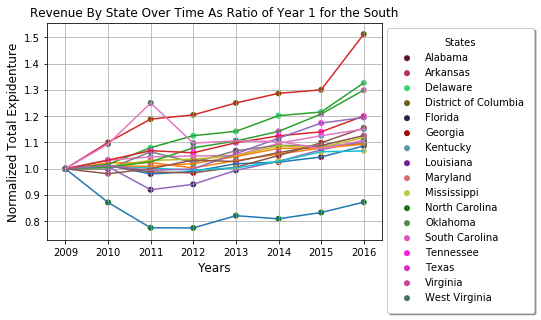

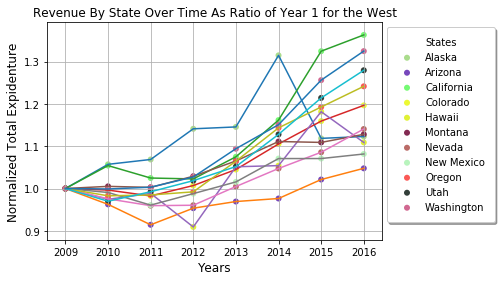

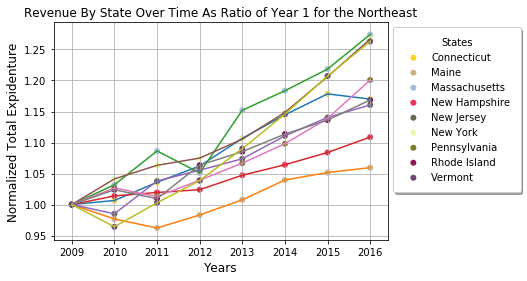

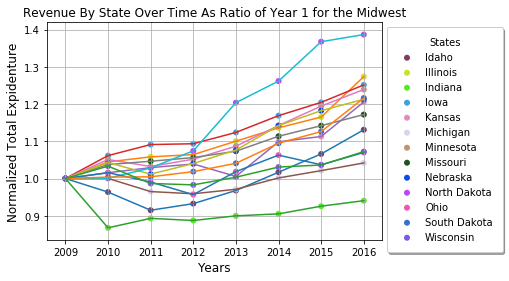

In [10]:
'''
Plot the total revenue (fed, state, local) for all states by year starting at 1.0 for Year 1 (2019)
'''

for region in revenue_df['region'].unique(): 

    states = revenue_df.loc[revenue_df['region'] == region]['state_name'].unique()
    years = revenue_df['year'].unique()
    plot_finances_as_ratio_of_year_one_plt(revenue_df, states, years, "Revenue", region)

# Revenue Data (Region By Region - sns)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


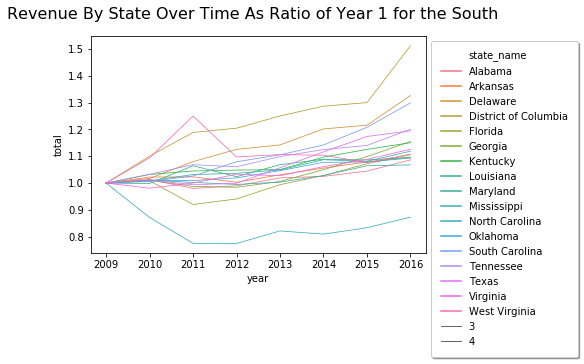

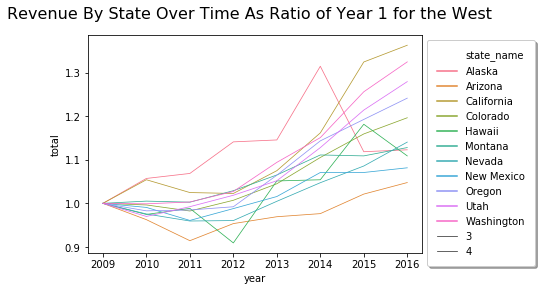

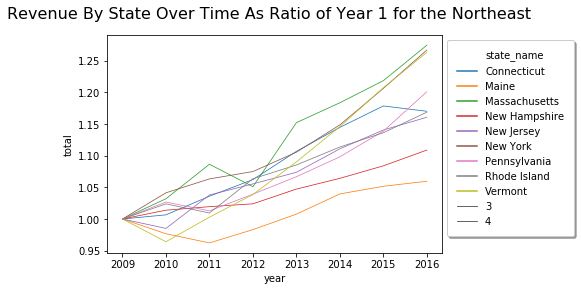

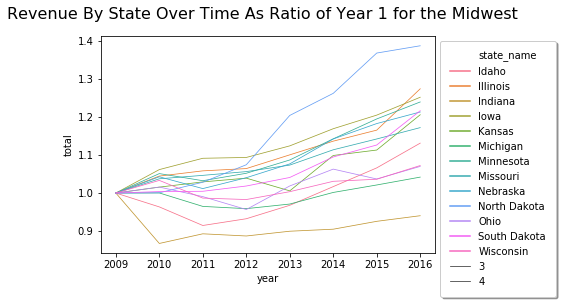

In [89]:
'''
Plot the total revenue (fed, state, local) for all states by year starting at 1.0 for Year 1 (2019)
'''

for region in revenue_df['region'].unique(): 

    states = revenue_df.loc[revenue_df['region'] == region]['state_name'].unique()
    years = revenue_df['year'].unique()   
    title_name= 'Revenue'   
    
    plot_finances_as_ratio_of_year_one_sns(revenue_df, states, years, title_name, region)